In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from tensorflow.keras.utils import to_categorical

from keras.layers import Input, Dense
from keras.models import Model

### Load & Combine Data

In [112]:
is_init = False
size = -1

label = []
dictionary = {}
c = 0

for i in os.listdir():
    if i.split(".")[-1] == "npy" and not (i.split(".")[0] == "labels"):
        if not is_init:
            is_init = True
            X = np.load(i)
            size = X.shape[0]
            y = np.array([i.split(".")[0]] * size).reshape(-1, 1)
        else:
            X = np.concatenate((X, np.load(i)))
            y = np.concatenate((y, np.array([i.split(".")[0]] * size).reshape(-1, 1)))

        label.append(i.split(".")[0])
        dictionary[i.split(".")[0]] = c
        c = c + 1

for i in range(y.shape[0]):
    y[i, 0] = dictionary[y[i, 0]]
y = np.array(y, dtype="int32")

y = to_categorical(y)

X_new = X.copy()
y_new = y.copy()
counter = 0

cnt = np.arange(X.shape[0])
np.random.shuffle(cnt)

for i in cnt:
    X_new[counter] = X[i]
    y_new[counter] = y[i]
    counter = counter + 1

ip = Input(shape=(X.shape[1]))

m = Dense(512, activation="relu")(ip)
m = Dense(256, activation="relu")(m)

op = Dense(y.shape[1], activation="softmax")(m)
model = Model(inputs=ip, outputs=op)


### Compile Model

In [113]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])
model.fit(X, y, epochs=50)

# model.save("model.h5")
# np.save("labels.npy", np.array(label))

Epoch 1/50
19/19 [==============================] - 1s 15ms/step - loss: 1.6902 - acc: 0.2767
Epoch 2/50
19/19 [==============================] - 0s 11ms/step - loss: 1.4409 - acc: 0.4350
Epoch 3/50
19/19 [==============================] - 0s 11ms/step - loss: 1.2272 - acc: 0.5367
Epoch 4/50
19/19 [==============================] - 0s 11ms/step - loss: 1.1034 - acc: 0.5567
Epoch 5/50
19/19 [==============================] - 0s 14ms/step - loss: 1.0135 - acc: 0.6083
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.9128 - acc: 0.6450
Epoch 7/50
19/19 [==============================] - 0s 11ms/step - loss: 0.8803 - acc: 0.6550
Epoch 8/50
19/19 [==============================] - 0s 12ms/step - loss: 0.8091 - acc: 0.6983
Epoch 9/50
19/19 [==============================] - 0s 11ms/step - loss: 0.7553 - acc: 0.7217
Epoch 10/50
19/19 [==============================] - 0s 11ms/step - loss: 0.7233 - acc: 0.7033
Epoch 11/50
19/19 [==============================] - 0s 19m

In [67]:

classes = ['happy', 'sad','angry','love','surprise', 'neutral']

data = X_new
labels = y_new

print(data.shape)
print(labels.shape)
from sklearn.model_selection import train_test_split

labels = to_categorical(labels, num_classes=len(classes))
print(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print('='*70)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(600, 1020)
(600, 6)
[[[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]

 ...

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]]]
(480, 1020)
(120, 1020)
(480, 6, 6)
(120, 6, 6)


### Confusion Matrix

4/4 [==============================] - 0s 4ms/step
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[0 2 0 0 0 0]
(120, 6)
[2 0 5 4 5 3 3 5 0 2 3 2 4 5 4 3 0 3 4 3 0 0 5 1 2 1 2 3 5 1 0 4 0 2 4 0 2
 1 1 3 4 5 4 3 4 1 2 3 4 0 2 4 2 4 5 3 4 0 5 1 3 0 3 1 2 5 1 0 3 3 2 5 4 0
 4 3 4 2 2 3 0 5 5 3 5 1 0 4 2 0 1 0 2 2 0 3 3 4 5 0 2 4 1 3 3 4 5 0 3 5 4
 1 3 1 3 3 1 4 4 3]
[2 0 5 4 5 3 3 5 0 2 3 2 4 5 4 2 1 3 4 3 0 0 5 1 2 1 2 3 5 1 0 4 0 2 4 0 2
 1 1 3 4 5 4 3 4 0 2 3 4 1 3 4 3 4 5 3 4 0 5 1 2 0 3 1 2 5 1 0 3 3 2 5 4 0
 4 3 4 2 2 4 0 5 5 3 5 1 0 4 2 0 1 0 2 2 1 3 3 4 5 0 2 4 1 3 3 4 5 0 3 5 4
 1 3 1 3 3 1 4 4 3]
Normalized confusion matrix


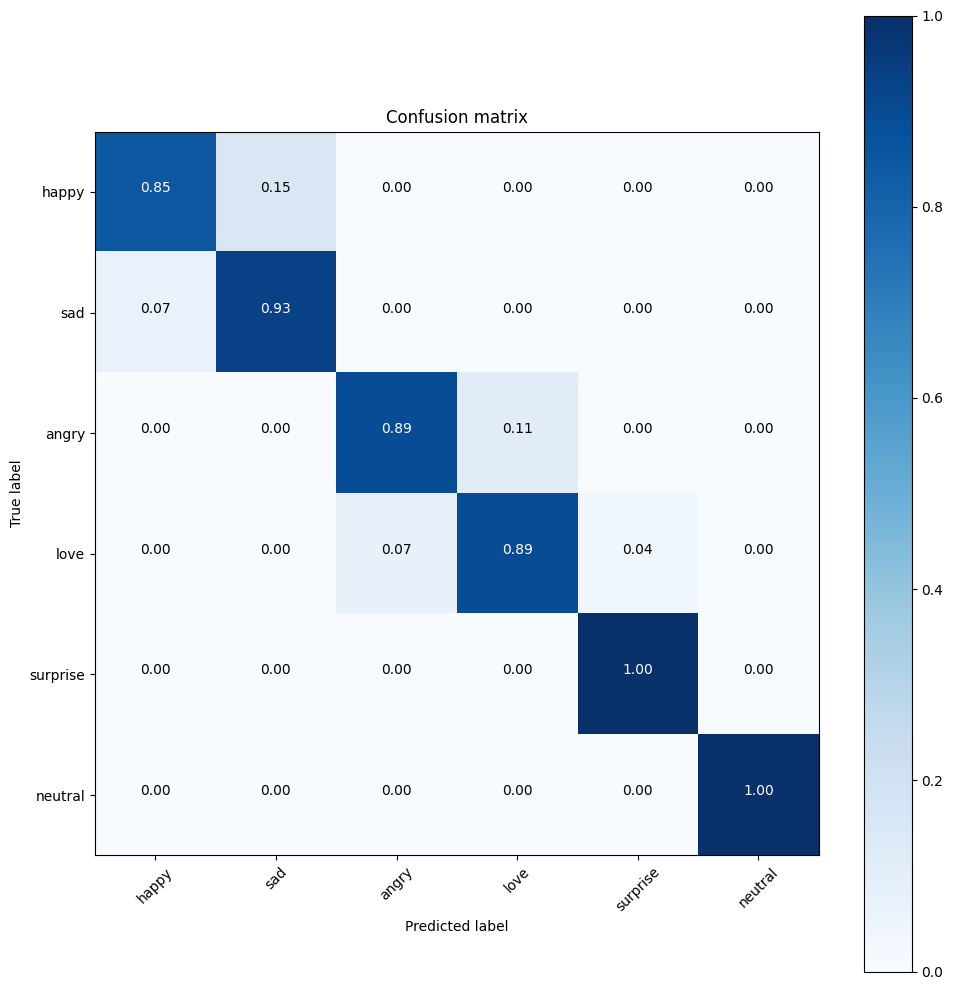

In [131]:
from sklearn.metrics import confusion_matrix

preds = np.argmax(model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)

print(y_test[0])
print(y_orig[0])
print(y_orig.shape)
print(preds)
# print(preds.shape)

# y_label = []
# for y in y_orig :
#   y_label.append(np.max(y))

y_label = np.array([2, 0, 5, 4, 5, 3, 3, 5, 0, 2, 3, 2, 4, 5, 4, 2, 1, 3, 4, 3, 0, 0, 5, 1, 2, 1, 2, 3, 5, 1, 0, 4, 0, 2, 4, 0, 2, 1, 1, 3, 4, 5, 4, 3, 4, 0, 2, 3, 4, 1, 3, 4, 3, 4, 5, 3, 4, 0, 5, 1, 2, 0, 3, 1, 2, 5, 1, 0, 3, 3, 2, 5, 4, 0, 4, 3, 4, 2, 2, 4, 0, 5, 5, 3, 5, 1, 0, 4, 2, 0, 1, 0, 2, 2, 1, 3, 3, 4, 5, 0, 2, 4, 1, 3, 3, 4, 5, 0, 3, 5, 4, 1, 3, 1, 3, 3, 1, 4, 4, 3])
print(y_label)
cm = confusion_matrix(preds, y_label)

from collections import OrderedDict

emotion = {'happy': 1, 'sad': 2, 'angry': 3, 'love': 4, 'surprise': 5, 'neutral': 6}
keys = OrderedDict(sorted(emotion.items(), key=lambda t: t[1])).keys()

# print(keys)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, keys, normalize=True)


### Evaluation Table

In [138]:
print(X_test.shape)
print(y_label.shape)
get_label = np.argmax(y_test, axis=1)
# print(get_label)
# print(get_label.shape)
# print(y_.shape)
test_loss, test_acc = model.evaluate(X_test, get_label, verbose=1)
print("\nTest Accuracy:", test_acc)

(120, 1020)
(120,)
4/4 [==============================] - 0s 6ms/step - loss: 27.4646 - acc: 0.2917

Test Accuracy: 0.2916666567325592


In [139]:

# prompt: print precision, recall dan f1-Score for each genre class & print the average value, display in table

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_label, preds, target_names=classes, digits=4)
print(report)

# Extract precision, recall, and F1-score for each class and average
lines = report.split('\n')
class_report_data = []
for line in lines[2:-5]:
    row_data = line.split()
    if len(row_data) > 0:
        class_name = row_data[0]
        precision = float(row_data[1])
        recall = float(row_data[2])
        f1_score = float(row_data[3])
        class_report_data.append([class_name, precision, recall, f1_score])

avg_total = lines[-2].split()
avg_precision = float(avg_total[3])
avg_recall = float(avg_total[4])
avg_f1_score = float(avg_total[5])

# Create a table for display
import pandas as pd

df = pd.DataFrame(class_report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score'])
df.loc[len(df)] = ['Average', avg_precision, avg_recall, avg_f1_score]

print(df)


              precision    recall  f1-score   support

       happy     0.8500    0.9444    0.8947        18
         sad     0.9333    0.8235    0.8750        17
       angry     0.8889    0.8889    0.8889        18
        love     0.8889    0.9231    0.9057        26
    surprise     1.0000    0.9583    0.9787        24
     neutral     1.0000    1.0000    1.0000        17

    accuracy                         0.9250       120
   macro avg     0.9269    0.9230    0.9238       120
weighted avg     0.9273    0.9250    0.9251       120

      Class  Precision  Recall  F1-Score
0     happy     0.8500  0.9444    0.8947
1       sad     0.9333  0.8235    0.8750
2     angry     0.8889  0.8889    0.8889
3      love     0.8889  0.9231    0.9057
4  surprise     1.0000  0.9583    0.9787
5   neutral     1.0000  1.0000    1.0000
6   Average     0.9250  0.9251  120.0000
